#Shopping Trends

En este análisis se tratará de entender las tendencias de la compra de ropa en Estados Unidos entre hombres y mujeres, así como el tipo de prendas de vestir compradas, el tipo de pago y la estación.

En la siguiente tabla nos muestra la información para poder realizar dicho análisis.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

shopping = pd.read_csv("/content/shopping_trends.csv")

# Muestra el DataFrame como una tabla
from IPython.display import display
shopping = pd.read_csv ("/content/shopping_trends.csv")
display(shopping)


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


# Tendencia de Compra por Género

La información de la base de datos nos indica que la mayor cantidad de personas que compran ropa, son los hombres con el 68%, y las mujeres con un 32% siendo la menor cantidad.

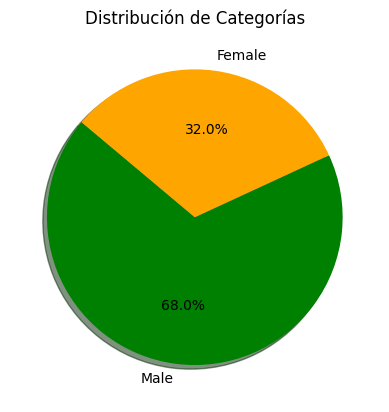

In [4]:
conteo_genero = shopping['Gender'].value_counts()

labels = conteo_genero.index
sizes = conteo_genero.values

colors = ['green', 'orange']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribución de Categorías')
plt.show()

#Tendencia de Compra de Tipo de Ropa por Género

Demostrando en la gráfica a continuación, que la mayoría de prendas que compran los hombres son Clothing. Y de igual manera podemos observar esta tendencia de mayor compra en las mujeres.



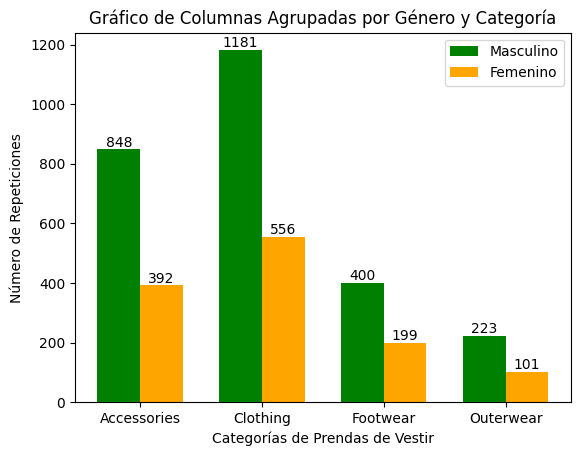

In [3]:
# Calcular las repeticiones de género por categoría
conteo_repeticiones = shopping.groupby(['Category', 'Gender']).size().unstack(fill_value=0)

# Configurar el ancho de las barras y la separación entre grupos
ancho_barra = 0.35
indice = np.arange(len(conteo_repeticiones))

# Crear el gráfico de columnas agrupadas
plt.bar(indice - ancho_barra/2, conteo_repeticiones['Male'], ancho_barra, label='Masculino', color="Green")
plt.bar(indice + ancho_barra/2, conteo_repeticiones['Female'], ancho_barra, label="Femenino", color="Orange")

# Configurar etiquetas y título
plt.xlabel('Categorías de Prendas de Vestir')
plt.ylabel('Número de Repeticiones')
plt.title('Gráfico de Columnas Agrupadas por Género y Categoría')

for i, val in enumerate(conteo_repeticiones['Male']):
    plt.text(i - ancho_barra/2, val + 0.1, str(val), ha='center', va='bottom', color='black')

for i, val in enumerate(conteo_repeticiones['Female']):
    plt.text(i + ancho_barra/2, val + 0.1, str(val), ha='center', va='bottom', color='black')

# Establecer etiquetas en el eje X
plt.xticks(indice, conteo_repeticiones.index)

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

# Ventas por Estación

Adicional, se puede observar la tendencia de compra por género en cada estación del año. Indicándonos, que en todas las estaciones compran más los hombres, destacando la Primavera como la mayor estación de compra del año.

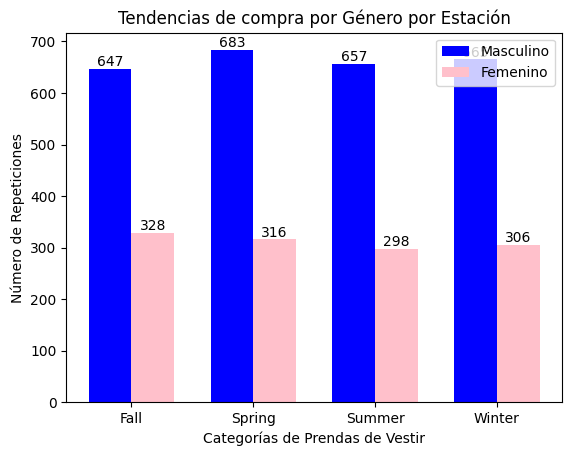

In [5]:
# Calcular las repeticiones de género por categoría
conteo_repeticiones = shopping.groupby(['Season', 'Gender']).size().unstack(fill_value=0)

# Configurar el ancho de las barras y la separación entre grupos
ancho_barra = 0.35
indice = np.arange(len(conteo_repeticiones))

# Crear el gráfico de columnas agrupadas
plt.bar(indice - ancho_barra/2, conteo_repeticiones['Male'], ancho_barra, label='Masculino', color="Blue")
plt.bar(indice + ancho_barra/2, conteo_repeticiones['Female'], ancho_barra, label="Femenino", color="Pink")

# Configurar etiquetas y título
plt.xlabel('Categorías de Prendas de Vestir')
plt.ylabel('Número de Repeticiones')
plt.title('Tendencias de compra por Género por Estación')

for i, val in enumerate(conteo_repeticiones['Male']):
    plt.text(i - ancho_barra/2, val + 0.1, str(val), ha='center', va='bottom', color='black')

for i, val in enumerate(conteo_repeticiones['Female']):
    plt.text(i + ancho_barra/2, val + 0.1, str(val), ha='center', va='bottom', color='black')

# Establecer etiquetas en el eje X
plt.xticks(indice, conteo_repeticiones.index)

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

##Prendas más vendidas en cada estación

Aquí veremos el tipo de prenda que más se compra dependiendo de la estación del año.
Mostrandónos, que en la estación de Primavera lo que destaca es Clothing.



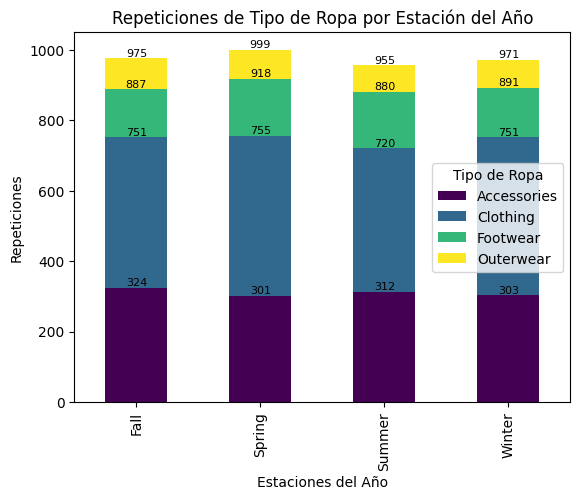

In [6]:
# Contar las repeticiones de cada combinación de estación y tipo de ropa
conteo_datos = shopping.groupby(['Season', 'Category']).size().unstack(fill_value=0)

# Configuración del gráfico
ax = conteo_datos.plot(kind='bar', stacked=True, colormap='viridis')

# Añadir etiquetas y leyenda
plt.xlabel('Estaciones del Año')
plt.ylabel('Repeticiones')
plt.title('Repeticiones de Tipo de Ropa por Estación del Año')
plt.legend(title='Tipo de Ropa')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8)

# Mostrar el gráfico
plt.show()

# Método de Pago

En la siguiente gráfica, tenemos el método de pago por género, en donde podemos observar que es muy parecido la tendencia de compra en tarjeta de crédito, efectivo, tarjeta de débito y paypal en cuanto a los hombres. Sin embargo, podemos ver que el método de pago favorito en las mujeres es la tarjeta de crédito, paypal y efectivo; diferenciándose de los hombres ya que en su caso la tarjeta de débito la utilizan en menor cantidad.  

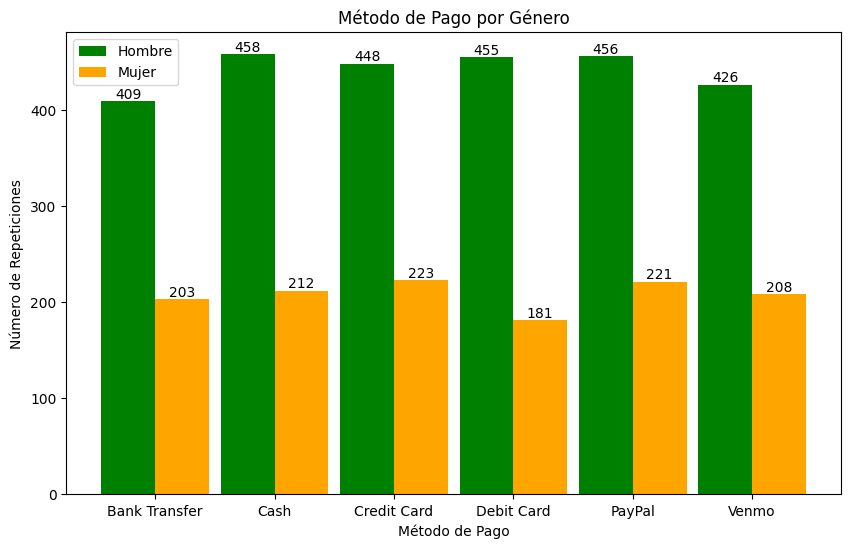

In [7]:
# Calcular las repeticiones de género por categoría
conteo_repeticiones = shopping.groupby(['Preferred Payment Method', 'Gender']).size().unstack(fill_value=0)

# Configurar el ancho de las barras y la separación entre grupos
ancho_barra = 0.45
indice = np.arange(len(conteo_repeticiones))

plt.figure(figsize=(10, 6))

# Crear el gráfico de columnas agrupadas
plt.bar(indice - ancho_barra/2, conteo_repeticiones['Male'], ancho_barra, label='Hombre', color='green')
plt.bar(indice + ancho_barra/2, conteo_repeticiones['Female'], ancho_barra, label='Mujer', color="orange")

# Configurar etiquetas y título
plt.xlabel('Método de Pago')
plt.ylabel('Número de Repeticiones')
plt.title('Método de Pago por Género')

for i, val in enumerate(conteo_repeticiones['Male']):
    plt.text(i - ancho_barra/2, val + 0.1, str(val), ha='center', va='bottom', color='black')

for i, val in enumerate(conteo_repeticiones['Female']):
    plt.text(i + ancho_barra/2, val + 0.1, str(val), ha='center', va='bottom', color='black')

# Establecer etiquetas en el eje X
plt.xticks(indice, conteo_repeticiones.index)

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

# Conclusión


En conclusión, se puede deducir que a través de esta información los hombres son los que más ropa compran en general. Sin embargo, de igual manera se pudo ver que durante las estaciones su compra se mantiene en un rango promedio destacando en primavera un leve aumento de volumen de ventas.
El tipo de ropa más consumido por hombres y mujeres es Clothing independientemente de la estación del año.
Por último, el método de pago más utilizado para hombres es cash y para mujeres credit card, por lo que se podría realizar una campaña de venta enfocados a estos métodos de pago.
